In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [3]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [4]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.05,NaN,S,Mr


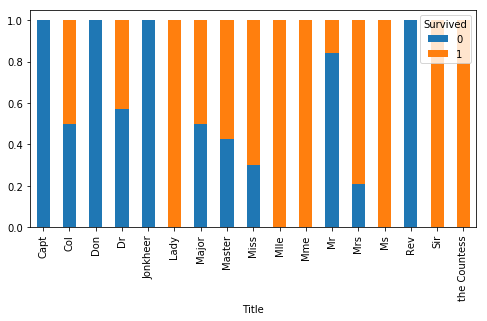

In [5]:
import seaborn as sns
royal = pd.crosstab(df['Title'], df['Survived'])
royal.div(royal.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,4))
plt.show()

In [6]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Don":        "Royalty",
    "Dr":         "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Sir" :       "Royalty",
    "Lady" :      "Royalty",
    "Master" :    "Master",
    "Miss" :      "Miss",
    "Mlle":       "Miss",
    "Mme":        "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Ms":         "Mrs",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":     "Royalty"
}

In [7]:
df['Title'] = df['Title'].map(normalized_titles)
test['Title'] = test['Title'].map(normalized_titles)

In [8]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

/home/therochvoices/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


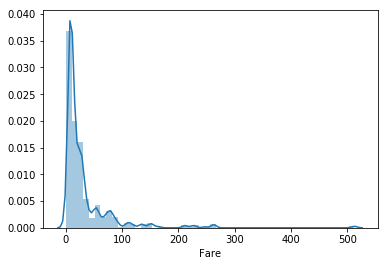

In [9]:
sns.distplot(df['Fare'])

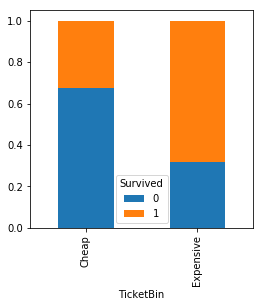

In [10]:
bins = [0, 50, 550]
names = ['Cheap', 'Expensive']
df['TicketBin'] = pd.cut(df['Fare'], bins, labels=names)

inc = pd.crosstab(df['TicketBin'], df['Survived'])
inc.div(inc.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [11]:
test['TicketBin'] = pd.cut(test['Fare'], bins, labels=names)

In [12]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [13]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TicketBin
553,1,3,male,22.0,0,0,2620,7.225,NaN,C,Mr,Cheap


In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

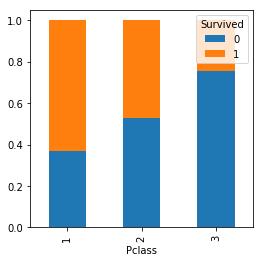

In [15]:
inc = pd.crosstab(df['Pclass'], df['Survived'])
inc.div(inc.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)
test['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [18]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TicketBin,Family
850,0,3,male,4.0,4,2,347082,31.275,NaN,S,Master,Cheap,7


In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

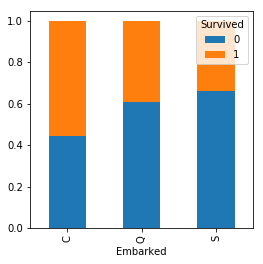

In [20]:
inc = pd.crosstab(df['Embarked'], df['Survived'])
inc.div(inc.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [21]:
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [22]:
df['Embarked'].fillna('C', inplace=True)

In [23]:
cabins = df[~df['Cabin'].isnull()]

In [32]:
cabins['C'] = cabins['Cabin'].astype(str).str[0]

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


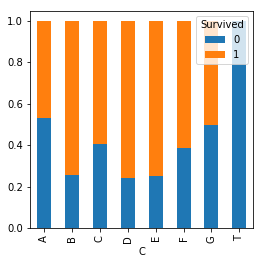

In [34]:
inc = pd.crosstab(cabins['C'], cabins['Survived'])
inc.div(inc.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

In [37]:
cabins[cabins['C'] == 'A'].describe()['Fare']

count    15.000000
mean     39.623887
std      17.975333
min       0.000000
25%      30.847900
50%      35.500000
75%      50.247900
max      81.858300
Name: Fare, dtype: float64

In [38]:
cabins[cabins['C'] == 'B'].describe()['Fare']

count     47.000000
mean     113.505764
std      109.301500
min        0.000000
25%       57.000000
50%       80.000000
75%      120.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
cabins[cabins['C'] == 'C'].describe()['Fare']

count     59.000000
mean     100.151341
std       70.225588
min       26.550000
25%       42.502100
50%       83.475000
75%      143.591650
max      263.000000
Name: Fare, dtype: float64

In [43]:
cabins[cabins['C'] == 'D'].describe()['Fare']

count     33.000000
mean      57.244576
std       29.592832
min       12.875000
25%       30.000000
50%       53.100000
75%       77.287500
max      113.275000
Name: Fare, dtype: float64

In [45]:
cabins[cabins['C'] == 'E'].describe()['Fare']

count     32.000000
mean      46.026694
std       32.608315
min        8.050000
25%       26.112500
50%       45.181250
75%       56.157300
max      134.500000
Name: Fare, dtype: float64

In [48]:
cabins[cabins['C'] == 'F'].describe()['Fare']

count    13.000000
mean     18.696792
std      11.728217
min       7.650000
25%       7.750000
50%      13.000000
75%      26.000000
max      39.000000
Name: Fare, dtype: float64

In [49]:
cabins[cabins['C'] == 'G'].describe()['Fare']

count     4.000000
mean     13.581250
std       3.601222
min      10.462500
25%      10.462500
50%      13.581250
75%      16.700000
max      16.700000
Name: Fare, dtype: float64

In [50]:
cabins[cabins['C'] == 'T'].describe()['Fare']

count     1.0
mean     35.5
std       NaN
min      35.5
25%      35.5
50%      35.5
75%      35.5
max      35.5
Name: Fare, dtype: float64

In [54]:
cabins[cabins['C']=='A']['Fare'].value_counts()

35.5000    2
81.8583    1
50.4958    1
34.6542    1
39.6000    1
0.0000     1
30.0000    1
56.9292    1
40.1250    1
30.6958    1
52.0000    1
26.0000    1
31.0000    1
50.0000    1
Name: Fare, dtype: int64

In [35]:
x = df[['Sex', 'Age', 'Title', 'Family', 'Fare', 'Pclass', 'Embarked']]
y = df['Survived']

In [36]:
x_t = test[['Sex', 'Age', 'Title', 'Family', 'Fare', 'Pclass', 'Embarked']]

In [37]:
x.sample()

,Sex,Age,Title,Family,Fare,Pclass,Embarked
769,male,32.0,Mr,1,8.3625,3,S


In [38]:
x_t.sample()

,Sex,Age,Title,Family,Fare,Pclass,Embarked
304,female,28.0,Miss,1,7.75,3,Q


In [39]:
x_ = x.iloc[:, 0:7].values
x_test = x_t.iloc[:, 0:7].values

In [40]:
x_

array([['male', 22.0, 'Mr', ..., 7.25, 3, 'S'],
       ['female', 38.0, 'Mrs', ..., 71.2833, 1, 'C'],
       ['female', 26.0, 'Miss', ..., 7.925, 3, 'S'],
       ...,
       ['female', 28.0, 'Miss', ..., 23.45, 3, 'S'],
       ['male', 26.0, 'Mr', ..., 30.0, 1, 'C'],
       ['male', 32.0, 'Mr', ..., 7.75, 3, 'Q']], dtype=object)

In [41]:
from  sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
x_[:, 0] = lEncoder.fit_transform(x_[:, 0])
x_test[:,0] = lEncoder.fit_transform(x_test[:,0])

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [42]:
x_[:, 2] = lEncoder.fit_transform(x_[:, 2])
x_test[:, 2] = lEncoder.fit_transform(x_test[:, 2])

In [43]:
x_[:, 6] = lEncoder.fit_transform(x_[:, 6])
x_test[:, 6] = lEncoder.fit_transform(x_test[:, 6])


In [45]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [2, 5, 6])
x_ = onehotencoder.fit_transform(x_).toarray()
x_test = onehotencoder.fit_transform(x_test).toarray()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_ = scaler.fit_transform(x_)
x_test = scaler.transform(x_test)

In [241]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=.2, random_state=21)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(x_, y)

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/therochvoices/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred = lr.predict(x_test)

In [244]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[95, 10],
       [19, 55]])

In [233]:
(95+54)/(95+10+20+54)

0.8324022346368715

In [49]:
test['Survived'] = y_pred

In [50]:
toSub = test[['PassengerId', 'Survived']]

In [51]:
toSub.to_csv('submission.csv', index=False)

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y_test)

In [56]:
mat

array([[94, 20],
       [11, 54]])

In [57]:
forrest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 10)],
)

In [119]:
from sklearn.ensemble import RandomForestClassifier


/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [62]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(n_jobs=-1)
forest_cv = GridSearchCV(estimator=forest, param_grid=forrest_params, cv=5, verbose=2) 

forest_cv.fit(x_train, y_train)

Fitting 5 folds for each of 525 candidates, totalling 2625 fits
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=2, min_samples_split=10, n_e

[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=7, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=20 
[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=20, total=   0.2s
[CV] max_depth=9, min_samples_leaf=3, min_samples_split=9, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=2

[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=6, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20

[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10 
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=10, n_es

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_e

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=7, n_e

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=9, n_e

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, min_samples_leaf=3, min_samples_spl

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=6, n_e

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_e

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=9, n_e

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=40, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_e

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_e

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=40, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_e

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40, total=   0.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_s

[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=40 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=40 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=40 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=5, n_e

[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=40 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=40, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=40 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=7, n_e

[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=40 
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=9, n_estimators=40, total=   0.2s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=9, n_e

[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=4, n_e

[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=6, n_e

[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=8, n_e

[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=3, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] max_depth=11, min_samples_leaf=3, min_samples_s

[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.3s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=30 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=30, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=5, n_e

[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=7, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=7, n_e

[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=10 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20, total=   0.3s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20, total=   0.2s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20, total=   0.3s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20 
[CV]  max_depth=11, min_samples_leaf=4, min_samples_split=9, n_estimators=20, total=   0.3s
[CV] max_depth=11, min_samples_leaf=4, min_samples_split=9, n_e

[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=4, n_e

[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=6, n_e

[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=8, n_e

[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=2, min_samples_sp

[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=5, n_e

[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=7, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=7, n_e

[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=9, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=9, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=9, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=9, n_e

[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=12, min_samples_leaf=4, min_samples_spl

[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=6, n_e

[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=40 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=7, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=7, n_e

[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=40 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=40 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=50 
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=9, n_estimators=50, total=   0.3s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=9, n_e

[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=4, n_e

[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=6, n_e

[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40, total=   0.2s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40, total=   0.2s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=8, n_e

[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.2s
[CV] max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=2, min_samples_split=10, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=2, min_samples_s

[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=5, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=5, n_e

[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30, total=   0.2s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=30, total=   0.2s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=7, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=7, n_e

[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=40 
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=40, total=   0.3s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=9, n_e

[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=4, n_e

[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=6, n_e

[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=8, n_e

[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=20, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=30 
[CV]  max_depth=13, min_samples_leaf=4, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] max_depth=13, min_samples_leaf=4, min_samples_s

[Parallel(n_jobs=1)]: Done 2625 out of 2625 | elapsed: 15.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [9, 10, 11, 12, 13], 'min_samples_split': [4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4], 'n_estimators': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [63]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

Best score: 0.8286516853932584
Optimal params: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [282]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [283]:
forest.fit(x_, y)
y_pred = forest.predict(x_test)

In [127]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_, y)
y_pred = xgb.predict(x_test)